In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
df=pd.read_csv('BTC-2021min.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 46.6+ MB


In [28]:
df['unix'] = pd.to_datetime(df['unix'], unit='s')
df.set_index(df['unix'], inplace=True)
df.drop('unix', axis=1, inplace=True)

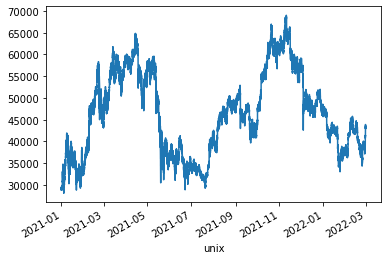

In [29]:
df['open'].plot();

In [30]:
convertion={
    'open':'first',
    'high':'max',
    'low':'min',
    'close':'mean',
    'Volume BTC':'sum',
    'Volume USD':'sum'
}

ds_df = df.resample('W').apply(convertion)
ds_df

,open,high,low,close,Volume BTC,Volume USD
unix,,,,,,
2021-01-03,29007.31,34800.00,28720.00,31172.974313,40809.064154,1.291321e+09
2021-01-10,33068.83,42000.00,27734.00,36721.623914,126513.782071,4.591673e+09
2021-01-17,38164.88,40112.78,30261.13,36040.602845,111650.143478,3.923291e+09
2021-01-24,35826.36,37874.71,28800.00,33922.876474,73139.220528,2.431962e+09
2021-01-31,32289.06,38620.00,29150.49,32978.309205,105347.757976,3.492067e+09
...,...,...,...,...,...,...
2022-02-06,37914.10,42701.86,36264.55,38984.885394,14028.678655,5.461039e+08
2022-02-13,42420.24,45850.00,41682.11,43319.238721,13089.951297,5.703055e+08
2022-02-20,42078.53,44785.66,37974.18,41728.124043,10925.014494,4.559464e+08


In [31]:
import plotly.graph_objects as go

from datetime import datetime

fig = go.Figure(go.Candlestick(
        x=ds_df.index,
        open=ds_df['open'],
        high=ds_df['high'],
        low=ds_df['low'],
        close=ds_df['close']
    ))

fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock',
    shapes = [dict(
        x0='2015-12-09', x1='2016-12-09', y0=0, y1=0.5, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-06-26', y=0.3, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='This is a strange peak!')]
)
fig.update_yaxes(type="log")
fig.show()

In [32]:
col = list(df.columns)

null_val = []
for i in col:
    null_val.append(df[i].isna().value_counts())
pd.DataFrame(null_val)

,False
date,610782
symbol,610782
open,610782
high,610782
low,610782
close,610782
Volume BTC,610782
Volume USD,610782


In [33]:
df.dropna(inplace=True)

In [34]:
import numpy as np
df.loc[(df.index == '2016-06-23 12:36:00'), ('low')] = np.nan
df['low'].interpolate(method='linear', axis=0, inplace=True)
df[(df.index > '2016-06-23 12:30') & (df.index < '2016-06-23 12:45')]['low']

Series([], Name: low, dtype: float64)

In [35]:
ds_df = df.resample('W').apply(convertion)
ds_df

fig = go.Figure(go.Candlestick(
        x=ds_df.index,
        open=ds_df['open'],
        high=ds_df['high'],
        low=ds_df['low'],
        close=ds_df['close']
    ))

fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock',
    shapes = [dict(
        x0='2015-12-09', x1='2016-12-09', y0=0, y1=0.5, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-06-26', y=0.3, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='There is no more outlier here!')]
)
fig.update_yaxes(type="log")
fig.show()

In [36]:
N=100

ds_df['rolling_mean' + str(N)] = ds_df.close.rolling(window=5).mean()
ds_df['rolling_ema_'+ str(N)]  = ds_df.close.ewm(min_periods=N, span=N).mean()

In [37]:
fig = go.Figure()



fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock'
)
fig.update_yaxes(type="log")

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['close'],
                        mode='lines',
                        name='close'))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_mean' + str(N)],
                    mode='lines',
                    name='MEAN ' + str(N),
                    line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_ema_' + str(N)],
                    mode='lines',
                    name='EMA ' + str(N),
                    line=dict(color='#555555', width=2)))

fig.add_annotation(x='2014-10-15', y=2.8, showarrow=True, startarrowhead=7,text='cross point')

fig.show()

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [39]:
features = ["open", "low", "Volume BTC", "Volume USD"]
target = "high"

# Renaming for ease
df.rename(columns = {'Volume_(Currency)':'Volume USD', 'Volume_(BTC)':'Volume BTC'}, inplace = True)

# Reduce df to scope
df = df[features + [target]]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610782 entries, 2022-03-01 03:43:00 to 2021-01-01 00:01:00
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        610782 non-null  float64
 1   low         610782 non-null  float64
 2   Volume BTC  610782 non-null  float64
 3   Volume USD  610782 non-null  float64
 4   high        610782 non-null  float64
dtypes: float64(5)
memory usage: 28.0 MB


In [41]:
df.dropna(inplace=True)
df.isna().sum() 

open          0
low           0
Volume BTC    0
Volume USD    0
high          0
dtype: int64

In [42]:
df.drop_duplicates(inplace=True) # Let's remove duplicates, how many rows now?
df.shape

(609972, 5)

In [43]:
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609972 entries, 2022-03-01 03:43:00 to 2021-01-01 00:01:00
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        609972 non-null  float32
 1   low         609972 non-null  float32
 2   Volume BTC  609972 non-null  float32
 3   Volume USD  609972 non-null  float32
 4   high        609972 non-null  float32
dtypes: float32(5)
memory usage: 16.3 MB


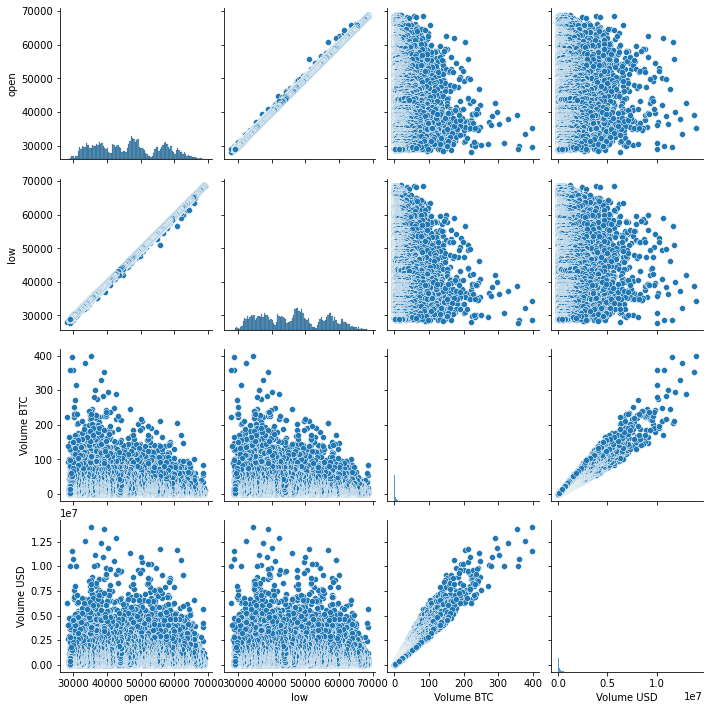

In [44]:
sns.pairplot(df[features])

Text(0.5, 1.0, 'Feature Correlation Plot')

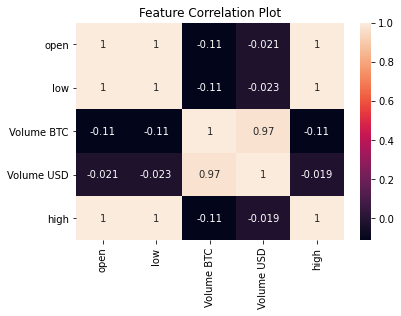

In [45]:
sns.heatmap(df[features + [target]].corr(), annot=True)
plt.title("Feature Correlation Plot")

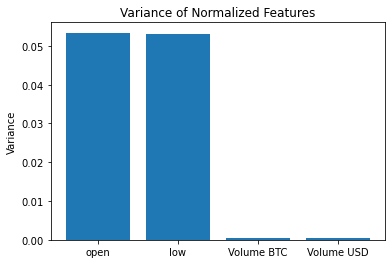

In [46]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

variances = df_norm.var()

fig, ax = plt.subplots()
ax.bar(variances.index, variances.values)
ax.set_ylabel('Variance')
ax.set_title('Variance of Normalized Features')
plt.show()

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
model.score(x_test, y_test)

0.9999847855210726

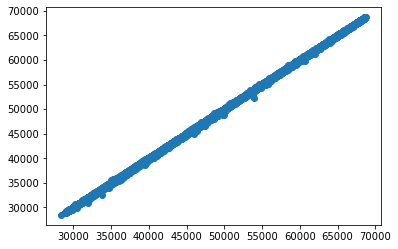

In [50]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

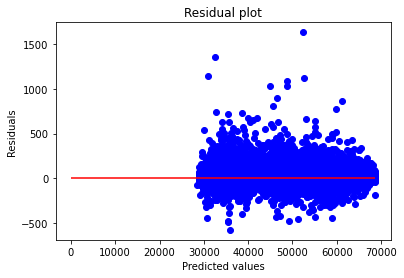

In [51]:
y_prediction = model.predict(x_test)
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals, color='blue')
plt.hlines(y=0, xmin=0, xmax=max(y_prediction), color='red')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

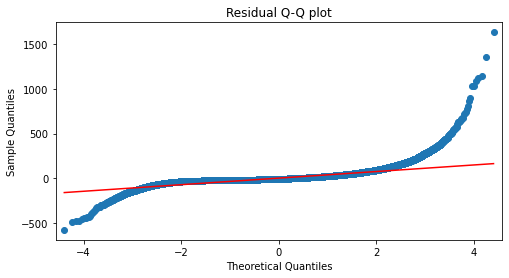

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Residual Q-Q plot')
plt.show()

In [53]:
r2_score(y_prediction, y_test)

0.999984785653424

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)

In [55]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [57]:
rf_model.score(x_test, y_test)

0.9999847855210726